# 군집화(Clustering)
- 비지도학습으로 정닶없이 특징만 가지고, 보유한 데이터로 모델을 구현

In [105]:
import pandas as pd
df = pd.read_csv('../Data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


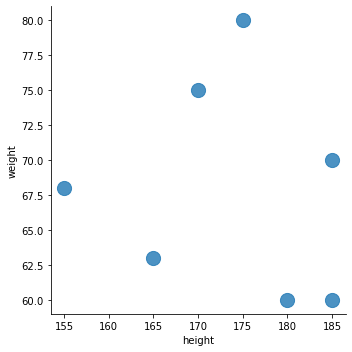

In [106]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    'height',
    'weight',
     data=df,
     fit_reg=False,
     scatter_kws={"s":200}
)
plt.show()

### k_Menas 군집화

In [107]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [108]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    n_clusters=3,
).fit(data_points)

In [109]:
# 각 군집의 중심위치 
kmeans.cluster_centers_

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

In [110]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


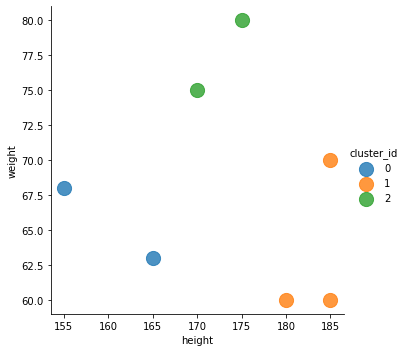

In [111]:
# 시각화
sns.lmplot(
    'height',
    'weight',
     data=df,
     fit_reg=False,
     scatter_kws={"s":200},
     hue='cluster_id'
)
plt.show()


---
# IRIS 군집화 비교

In [112]:
iris = pd.read_csv('../Data/iris.csv')

In [113]:
# Name을 숫자로 변환하기
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2})

In [114]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [115]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### k-Means 군집화

In [116]:
iris2 = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
data_points = iris2.values
kmeans = KMeans(n_clusters=3).fit(data_points) # numpy array가 기본 데이터

In [118]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [119]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [120]:
iris['cluster_id'] = kmeans.labels_

# 시각화 해보기
cluster id의 일련번호가 틀리게 나올 수 있으므로 시각활를 통한 확인이 필요

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


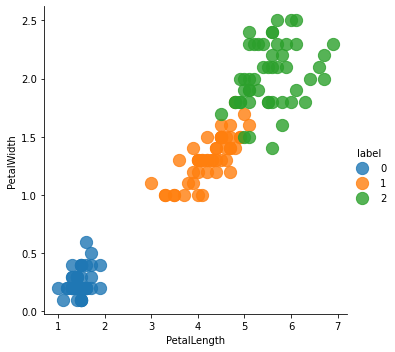

In [121]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={"s":150},
    hue="label"
)
plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


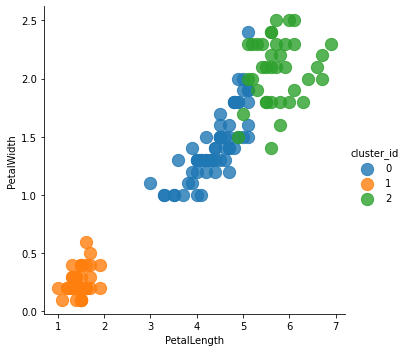

In [122]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={"s":150},
    hue="cluster_id"
)

In [125]:
# cluster_id : 0->1, 1->0, 2->2
# 시각화를 통해 라벨순서 맞추주기
iris['cluster_id2'] = iris['cluster_id'].map({0:1, 1:0, 2:2})

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


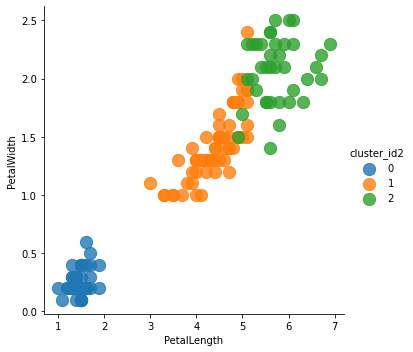

In [126]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={"s":150},
    hue="cluster_id2"
)

In [127]:
sum(iris['label'] == iris['cluster_id2']) / len(iris)

0.8933333333333333

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333